In [1072]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # ANOVA F-value for classification tasks
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


In [1073]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [1074]:
df = df.drop(['Unnamed: 32'], axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1075]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [1076]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [1077]:
print(df['diagnosis'].unique())

['M' 'B']


In [1078]:
diagosis_map = {'M': 1, 'B':0}
df['diagnosis'] = df['diagnosis'].map(diagosis_map)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1079]:
df = df.drop(['id'], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1080]:
numberOfMalignant = df[df['diagnosis'] == 1].shape[0]
print(numberOfMalignant)
numberOfBenign = df[df['diagnosis'] == 0].shape[0]
print(numberOfBenign)

212
357


In [1081]:
#upsampling the minority to match the majority dataset count
# Separate the data into 'M' and 'B' classes
df_minority = df[df['diagnosis'] == 1]
df_majority = df[df['diagnosis'] == 0]

# Upsample the minority class to match the number of samples in the majority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine the upsampled minority class with the majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the DataFrame to mix the rows
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Now df_upsampled has an equal number of 'M' and 'B' samples
len(df_upsampled)


714

In [1082]:
numberOfMalignant = df_upsampled[df_upsampled['diagnosis'] == 1].shape[0]
print(numberOfMalignant)
numberOfBenign = df_upsampled[df_upsampled['diagnosis'] == 0].shape[0]
print(numberOfBenign)

357
357


In [1083]:
#A MinMax scaler is employed to bring the features of the dataset to a uniform range between 0 and 1.
X = df_upsampled.drop(['diagnosis'], axis=1)
y = df_upsampled['diagnosis']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the features and transform them
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features with the target variable 'diagnosis'
df_scaled['diagnosis'] = y
original_data = df_scaled

# Now df_scaled contains the features scaled between 0 and 1
df_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.320365,0.475482,0.309239,0.189396,0.250970,0.166735,0.110052,0.116501,0.423648,0.091196,...,0.407513,0.237014,0.127998,0.148650,0.128386,0.108546,0.209828,0.216440,0.069261,0
1,0.317052,0.223876,0.303849,0.183245,0.362372,0.182077,0.041050,0.093439,0.339275,0.244103,...,0.232783,0.254943,0.144564,0.364723,0.141784,0.096326,0.299107,0.244628,0.193116,0
2,0.220503,0.291512,0.216847,0.114104,0.555836,0.281899,0.165651,0.173211,0.440285,0.320977,...,0.490609,0.174810,0.082703,0.644720,0.262143,0.229473,0.418557,0.244628,0.304595,0
3,0.414075,0.053094,0.407781,0.256076,0.466462,0.378467,0.279053,0.308698,0.430184,0.266007,...,0.062038,0.309229,0.164447,0.547646,0.297174,0.319808,0.498969,0.195545,0.226941,0
4,0.341190,0.476835,0.339161,0.198176,0.379164,0.380864,0.261246,0.321173,0.698158,0.302654,...,0.649687,0.321679,0.153878,0.559532,0.415776,0.299042,0.608935,0.622708,0.403188,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.291968,0.190396,0.286919,0.167720,0.372032,0.224642,0.217737,0.173111,0.452763,0.255055,...,0.241320,0.235370,0.120945,0.506042,0.217777,0.240335,0.334089,0.450227,0.265259,0
710,0.151403,0.264457,0.147398,0.071941,0.482712,0.224779,0.041425,0.095179,0.505051,0.402696,...,0.307911,0.107226,0.046795,0.458496,0.128167,0.052492,0.191581,0.293712,0.279162,0
711,0.220029,0.662158,0.214774,0.115207,0.369595,0.227245,0.167760,0.100249,0.439097,0.246420,...,0.762379,0.177449,0.084202,0.458496,0.193068,0.233466,0.234880,0.260004,0.145473,0
712,0.643144,0.272574,0.615783,0.501591,0.289880,0.202931,0.203608,0.348757,0.446821,0.141323,...,0.324132,0.539818,0.435214,0.347553,0.174949,0.192971,0.639175,0.233590,0.288064,1


### A- Initial features 

In [1084]:
#preparing the initial features data set
y = df_scaled['diagnosis']
df_scaled = df_scaled.drop('diagnosis', axis=1)

# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()

# Create a mask to identify highly correlated features
highly_correlated_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
highly_correlated_features = (correlation_matrix.abs() > 0.8) & highly_correlated_mask

# Identify pairs of features to drop
features_to_drop = set()
for i in range(len(highly_correlated_features.columns)):
    correlated_feature = highly_correlated_features.columns[i]
    for j in range(i):
        if highly_correlated_features.iloc[j, i]:
            features_to_drop.add(correlated_feature)

# Drop the identified features
df_scaled = df_scaled.drop(columns=features_to_drop)
df_scaled

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0.320365,0.475482,0.250970,0.166735,0.423648,0.091196,0.117038,0.153996,0.089676,0.183390,0.190756,0.337788,0.075736,0.148650,0.216440,0.069261
1,0.317052,0.223876,0.362372,0.182077,0.339275,0.244103,0.033750,0.026498,0.071897,0.037372,0.096174,0.049610,0.027714,0.364723,0.244628,0.193116
2,0.220503,0.291512,0.555836,0.281899,0.440285,0.320977,0.070433,0.286598,0.232077,0.156578,0.264823,0.144985,0.101751,0.644720,0.244628,0.304595
3,0.414075,0.053094,0.466462,0.378467,0.430184,0.266007,0.018649,0.005945,0.146888,0.119776,0.202122,0.072194,0.047027,0.547646,0.195545,0.226941
4,0.341190,0.476835,0.379164,0.380864,0.698158,0.302654,0.111968,0.328147,0.311623,0.261724,0.308202,0.692598,0.133811,0.559532,0.622708,0.403188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.291968,0.190396,0.372032,0.224642,0.452763,0.255055,0.057758,0.095584,0.233572,0.134572,0.180640,0.369704,0.089279,0.506042,0.450227,0.265259
710,0.151403,0.264457,0.482712,0.224779,0.505051,0.402696,0.048959,0.189356,0.210287,0.088233,0.144421,0.345067,0.099022,0.458496,0.293712,0.279162
711,0.220029,0.662158,0.369595,0.227245,0.439097,0.246420,0.073149,0.456551,0.276983,0.164689,0.174560,0.314831,0.042605,0.458496,0.260004,0.145473
712,0.643144,0.272574,0.289880,0.202931,0.446821,0.141323,0.156437,0.082589,0.119387,0.081323,0.253836,0.112136,0.091110,0.347553,0.233590,0.288064


In [1085]:
# Split the data into training and testing sets
X_train_initial, X_test_initial, y_train_initial, y_test_initial = train_test_split(df_scaled, y, test_size=0.2, random_state=44)

#### 1- Random forest Model

In [1086]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 10, max_features = 'log2', min_samples_split = 2)
rf.fit(X_train_initial, y_train_initial)
y_pred_initial = rf.predict(X_test_initial)

In [1087]:
rf_accuracy_initial  = accuracy_score(y_test_initial, y_pred_initial)
rf_precision_initial = precision_score(y_test_initial, y_pred_initial)
rf_recall_initial    = recall_score(y_test_initial, y_pred_initial)
rf_f1_initial        = f1_score(y_test_initial, y_pred_initial)
rf_roc_auc_initial   = roc_auc_score(y_test_initial, y_pred_initial)

In [1088]:
rf_initial_results = pd.DataFrame([['Random Forest Classifier', (rf_accuracy_initial*100), rf_precision_initial, rf_recall_initial, rf_f1_initial, rf_roc_auc_initial]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
rf_initial_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,Random Forest Classifier,100.0,1.0,1.0,1.0,1.0


In [1089]:
rf_cm_initial = confusion_matrix(y_test_initial, y_pred_initial)
false_negative_rf=rf_cm_initial[1: ,:-1]
false_positive_rf=rf_cm_initial[ :1 , 1:]
print(rf_cm_initial)

[[73  0]
 [ 0 70]]


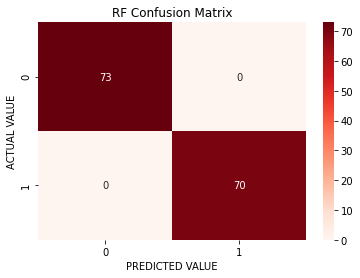

In [1090]:
sns.heatmap(rf_cm_initial, annot=True, fmt="d", cmap="Reds")
plt.title("RF Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()

#### 2- SVM model

In [1091]:
svc=SVC() 
# fit classifier to training set
svc.fit(X_train_initial,y_train_initial)
# make predictions on test set
y_pred_initial=svc.predict(X_test_initial)

In [1092]:
svc_accuracy_initial  = accuracy_score(y_test_initial, y_pred_initial)
svc_precision_initial = precision_score(y_test_initial, y_pred_initial)
svc_recall_initial    = recall_score(y_test_initial, y_pred_initial)
svc_f1_initial        = f1_score(y_test_initial, y_pred_initial)
svc_roc_auc_initial   = roc_auc_score(y_test_initial, y_pred_initial)

In [1093]:
svc_initial_results = pd.DataFrame([['SVM Classifier', (svc_accuracy_initial*100), svc_precision_initial, svc_recall_initial, svc_f1_initial, svc_roc_auc_initial]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
svc_initial_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,SVM Classifier,96.503497,0.971014,0.957143,0.964029,0.964873


In [1094]:
svc_cm_initial = confusion_matrix(y_test_initial, y_pred_initial)
false_negative_rf=svc_cm_initial[1: ,:-1]
false_positive_rf=svc_cm_initial[ :1 , 1:]
print(svc_cm_initial)

[[71  2]
 [ 3 67]]


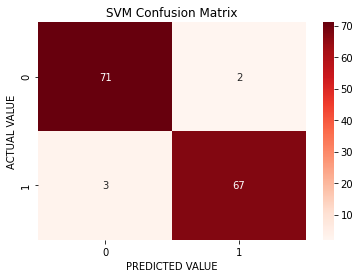

In [1095]:
sns.heatmap(svc_cm_initial, annot=True, fmt="d", cmap="Reds")
plt.title("SVM Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()

#### 3- Decision tree model

In [1096]:
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0)
dt.fit(X_train_initial, y_train_initial )
y_pred_initial = dt.predict(X_test_initial)

In [1097]:
dt_accuracy_initial  = accuracy_score(y_test_initial, y_pred_initial)
dt_precision_initial = precision_score(y_test_initial, y_pred_initial)
dt_recall_initial    = recall_score(y_test_initial, y_pred_initial)
dt_f1_initial        = f1_score(y_test_initial, y_pred_initial)
dt_roc_auc_initial   = roc_auc_score(y_test_initial, y_pred_initial)
dt_initial_results = pd.DataFrame([['Decision tree', (dt_accuracy_initial*100), dt_precision_initial, dt_recall_initial, dt_f1_initial, dt_roc_auc_initial]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
dt_initial_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,Decision tree,95.104895,0.956522,0.942857,0.94964,0.950881


In [1098]:
dt_cm_initial = confusion_matrix(y_test_initial, y_pred_initial)
false_negative_rf=dt_cm_initial[1: ,:-1]
false_positive_rf=dt_cm_initial[ :1 , 1:]
print(dt_cm_initial)

[[70  3]
 [ 4 66]]


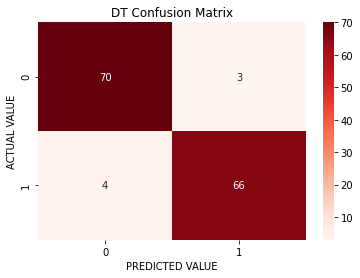

In [1099]:
sns.heatmap(dt_cm_initial, annot=True, fmt="d", cmap="Reds")
plt.title("DT Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()

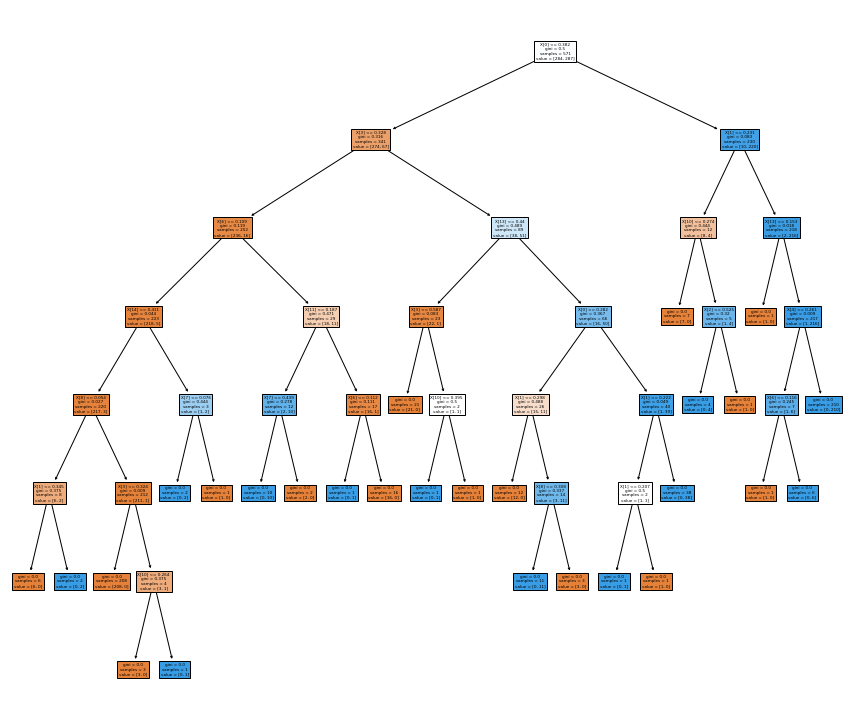

In [1100]:
plt.figure(3, figsize=(15, 13))
plot_tree(dt, filled=True)
plt.show()

### 4- Multilayer Perceptron model

In [1101]:
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(64,32), max_iter=3000)
mlp.fit(X_train_initial, y_train_initial)
y_pred_initial = mlp.predict(X_test_initial)

In [1102]:
mlp_accuracy_initial  = accuracy_score(y_test_initial, y_pred_initial)
mlp_precision_initial = precision_score(y_test_initial, y_pred_initial)
mlp_recall_initial    = recall_score(y_test_initial, y_pred_initial)
mlp_f1_initial        = f1_score(y_test_initial, y_pred_initial)
mlp_roc_auc_initial   = roc_auc_score(y_test_initial, y_pred_initial)
mlp_initial_results = pd.DataFrame([['Multilayer Perceptron', (mlp_accuracy_initial*100), mlp_precision_initial, mlp_recall_initial, mlp_f1_initial, mlp_roc_auc_initial]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
mlp_initial_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,Multilayer Perceptron,97.202797,0.958333,0.985714,0.971831,0.972309


In [1103]:
mlp_cm_initial = confusion_matrix(y_test_initial, y_pred_initial)
false_negative_rf=mlp_cm_initial[1: ,:-1]
false_positive_rf=mlp_cm_initial[ :1 , 1:]
print(mlp_cm_initial)

[[70  3]
 [ 1 69]]


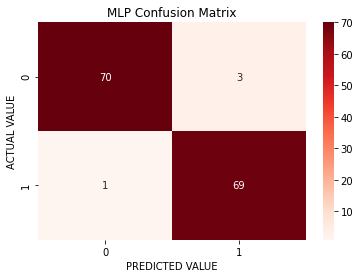

In [1104]:
sns.heatmap(mlp_cm_initial, annot=True, fmt="d", cmap="Reds")
plt.title("MLP Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()

#### 5- KNN model

In [1105]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_initial, y_train_initial)
y_pred_initial = knn.predict(X_test_initial)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [1106]:
knn_accuracy_initial  = accuracy_score(y_test_initial, y_pred_initial)
knn_precision_initial = precision_score(y_test_initial, y_pred_initial)
knn_recall_initial    = recall_score(y_test_initial, y_pred_initial)
knn_f1_initial        = f1_score(y_test_initial, y_pred_initial)
knn_roc_auc_initial   = roc_auc_score(y_test_initial, y_pred_initial)
knn_initial_results = pd.DataFrame([['KNN', (knn_accuracy_initial*100), knn_precision_initial, knn_recall_initial, knn_f1_initial, knn_roc_auc_initial]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
knn_initial_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,KNN,97.902098,1.0,0.957143,0.978102,0.978571


In [1107]:
knn_cm_initial = confusion_matrix(y_test_initial, y_pred_initial)
false_negative_rf=knn_cm_initial[1: ,:-1]
false_positive_rf=knn_cm_initial[ :1 , 1:]
print(knn_cm_initial)

[[73  0]
 [ 3 67]]


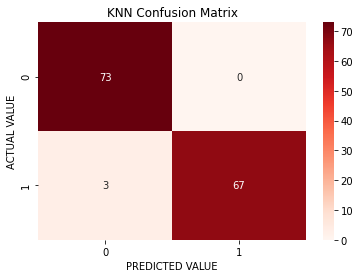

In [1108]:
sns.heatmap(knn_cm_initial, annot=True, fmt="d", cmap="Reds")
plt.title("KNN Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()

### Initial dataset results

In [1109]:
initial_results = pd.DataFrame([
    ['Random forest', (rf_accuracy_initial*100), rf_precision_initial, rf_recall_initial, rf_f1_initial, rf_roc_auc_initial],
    ['SVM', (svc_accuracy_initial*100), svc_precision_initial, svc_recall_initial, svc_f1_initial, svc_roc_auc_initial],
    ['Decision tree', (dt_accuracy_initial*100), dt_precision_initial, dt_recall_initial, dt_f1_initial, dt_roc_auc_initial],
    ['Multilayer Perceptron', (mlp_accuracy_initial*100), mlp_precision_initial, mlp_recall_initial, mlp_f1_initial, mlp_roc_auc_initial],
    ['KNN', (knn_accuracy_initial*100), knn_precision_initial, knn_recall_initial, knn_f1_initial, knn_roc_auc_initial]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])


In [1110]:
initial_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,Random forest,100.000000,1.000000,1.000000,1.000000,1.000000
1,SVM,96.503497,0.971014,0.957143,0.964029,0.964873
2,Decision tree,95.104895,0.956522,0.942857,0.949640,0.950881
3,Multilayer Perceptron,97.202797,0.958333,0.985714,0.971831,0.972309
4,KNN,97.902098,1.000000,0.957143,0.978102,0.978571


### B- Minimal Features

In [1111]:
#preparing the minimal dataset

#Recursive Feature Elimination

# Initialize the Extra Trees classifier
estimator = ExtraTreesClassifier(n_estimators=100, random_state=0)

# Initialize RFE with the Extra Trees classifier and the number of features to select
rfe = RFE(estimator, n_features_to_select=8, step=1)

# Fit RFE on the training data
rfe.fit(df_scaled, y)

# Get the selected features
selected_features = df_scaled.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)
print(rfe.support_)

Selected Features: Index(['radius_mean', 'texture_mean', 'compactness_mean', 'radius_se',
       'concave points_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')
[ True  True False  True False False  True False False False  True False
 False  True  True  True]


In [1112]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# # Fit the model on the training data
logreg.fit(df_scaled, y)

# Get feature importance using coefficients
feature_importance = abs(logreg.coef_[0])

# Create a DataFrame with feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': df_scaled.columns,
    'Importance': feature_importance
})

# # Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Select the top eight features
selected_features2 = feature_importance_df.head(8)['Feature'].tolist()
selected_features2

['radius_mean',
 'texture_mean',
 'radius_se',
 'compactness_mean',
 'smoothness_worst',
 'fractal_dimension_mean',
 'symmetry_worst',
 'concave points_se']

In [1113]:
# Univariate Selection
# Select the top 8 features using ANOVA F-value
k_best = SelectKBest(score_func=f_classif, k=8)
X_best = k_best.fit_transform(df_scaled, y)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features3 = df_scaled.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:", selected_features3)

Selected Features: Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'radius_se', 'concave points_se', 'smoothness_worst', 'symmetry_worst'],
      dtype='object')


In [1114]:
# Use set intersection to find common column names between pairs of lists
common_columns_1_2 = set(selected_features) & set(selected_features2)
common_columns_1_3 = set(selected_features) & set(selected_features3)
common_columns_2_3 = set(selected_features2) & set(selected_features3)

# Combine the results to get column names that exist in at least two lists
common_columns = common_columns_1_2 | common_columns_1_3 | common_columns_2_3

common_columns_list = list(common_columns)

# Print the common column names
print("Common Column Names:", common_columns_list)

Common Column Names: ['radius_mean', 'smoothness_worst', 'texture_mean', 'radius_se', 'concave points_se', 'symmetry_worst', 'compactness_mean']


In [1115]:
#the minimal features
mininal_data_set = original_data[common_columns_list]
mininal_data_set
# Split the data into training and testing sets
X_train_minimal, X_test_minimal, y_train_minimal, y_test_minimal = train_test_split(mininal_data_set, y, test_size=0.2, random_state=44)

#### 1- Random forest model

In [1116]:
rf.fit(X_train_minimal, y_train_minimal)
y_pred_minimal = rf.predict(X_test_minimal)

In [1117]:
rf_accuracy_minimal = accuracy_score(y_test_minimal, y_pred_minimal)
rf_precision_minimal = precision_score(y_test_minimal, y_pred_minimal)
rf_recall_minimal = recall_score(y_test_minimal, y_pred_minimal)
rf_f1_minimal = f1_score(y_test_minimal, y_pred_minimal)
rf_roc_auc_minimal= roc_auc_score(y_test_minimal, y_pred_minimal)
rf_minimal_results = pd.DataFrame([['Random Forest Classifier', (rf_accuracy_minimal*100), rf_precision_minimal, rf_recall_minimal, rf_f1_minimal, rf_roc_auc_minimal]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
rf_minimal_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,Random Forest Classifier,99.300699,1.0,0.985714,0.992806,0.992857


In [1118]:
rf_cm_minimal = confusion_matrix(y_test_minimal, y_pred_minimal)
false_negative_rf=rf_cm_minimal[1: ,:-1]
false_positive_rf=rf_cm_minimal[ :1 , 1:]
print(rf_cm_minimal)

[[73  0]
 [ 1 69]]


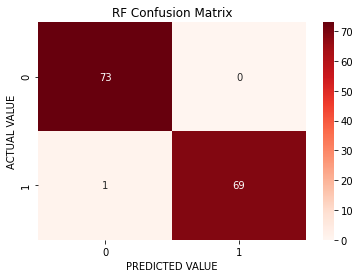

In [1119]:
sns.heatmap(rf_cm_minimal, annot=True, fmt="d", cmap="Reds")
plt.title("RF Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()

#### 2- SVM Model

In [1120]:
# fit classifier to training set
svc.fit(X_train_minimal,y_train_minimal)
# make predictions on test set
y_pred_minimal=svc.predict(X_test_minimal)

In [1121]:
svc_accuracy_minimal = accuracy_score(y_test_minimal, y_pred_minimal)
svc_precision_minimal = precision_score(y_test_minimal, y_pred_minimal)
svc_recall_minimal = recall_score(y_test_minimal, y_pred_minimal)
svc_f1_minimal = f1_score(y_test_minimal, y_pred_minimal)
svc_roc_auc_minimal= roc_auc_score(y_test_minimal, y_pred_minimal)
svc_minimal_results = pd.DataFrame([['SVM', (svc_accuracy_minimal*100), svc_precision_minimal, svc_recall_minimal, svc_f1_minimal, svc_roc_auc_minimal]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
svc_minimal_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,SVM,95.804196,0.970588,0.942857,0.956522,0.95773


In [1122]:
svc_cm_minimal = confusion_matrix(y_test_minimal, y_pred_minimal)
false_negative_svc=svc_cm_minimal[1: ,:-1]
false_positive_svc=svc_cm_minimal[ :1 , 1:]
print(svc_cm_minimal)

[[71  2]
 [ 4 66]]


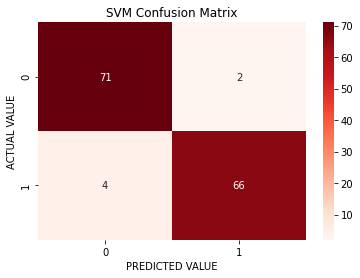

In [1123]:
sns.heatmap(svc_cm_minimal, annot=True, fmt="d", cmap="Reds")
plt.title("SVM Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()

#### 3- Decision tree model

In [1124]:
dt.fit(X_train_minimal, y_train_minimal )
y_pred_minimal = dt.predict(X_test_minimal)

In [1125]:
dt_accuracy_minimal = accuracy_score(y_test_minimal, y_pred_minimal)
dt_precision_minimal = precision_score(y_test_minimal, y_pred_minimal)
dt_recall_minimal = recall_score(y_test_minimal, y_pred_minimal)
dt_f1_minimal = f1_score(y_test_minimal, y_pred_minimal)
dt_roc_auc_minimal= roc_auc_score(y_test_minimal, y_pred_minimal)
dt_minimal_results = pd.DataFrame([['Decision tree', (dt_accuracy_minimal*100), dt_precision_minimal, dt_recall_minimal, dt_f1_minimal, dt_roc_auc_minimal]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
dt_minimal_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,Decision tree,96.503497,0.971014,0.957143,0.964029,0.964873


In [1126]:
dt_cm_minimal = confusion_matrix(y_test_minimal, y_pred_minimal)
false_negative_dt=dt_cm_minimal[1: ,:-1]
false_positive_dt=dt_cm_minimal[ :1 , 1:]
print(dt_cm_minimal)

[[71  2]
 [ 3 67]]


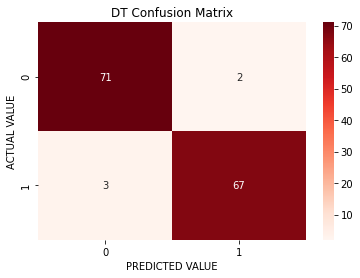

In [1127]:
sns.heatmap(dt_cm_minimal, annot=True, fmt="d", cmap="Reds")
plt.title("DT Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()

### 4- Multilayer Perceptron 

In [1128]:
mlp.fit(X_train_minimal, y_train_minimal)
y_pred_minimal = mlp.predict(X_test_minimal)


In [1129]:
mlp_accuracy_minimal = accuracy_score(y_test_minimal, y_pred_minimal)
mlp_precision_minimal = precision_score(y_test_minimal, y_pred_minimal)
mlp_recall_minimal = recall_score(y_test_minimal, y_pred_minimal)
mlp_f1_minimal = f1_score(y_test_minimal, y_pred_minimal)
mlp_roc_auc_minimal= roc_auc_score(y_test_minimal, y_pred_minimal)
mlp_minimal_results = pd.DataFrame([['Multilayer Perceptron', (mlp_accuracy_minimal*100), mlp_precision_minimal, mlp_recall_minimal, mlp_f1_minimal, mlp_roc_auc_minimal]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
mlp_minimal_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,Multilayer Perceptron,97.202797,0.985294,0.957143,0.971014,0.971722


In [1130]:
mlp_cm_minimal = confusion_matrix(y_test_minimal, y_pred_minimal)
false_negative_mlp=mlp_cm_minimal[1: ,:-1]
false_positive_mlp=mlp_cm_minimal[ :1 , 1:]
print(mlp_cm_minimal)

[[72  1]
 [ 3 67]]


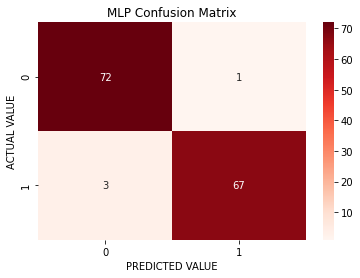

In [1131]:
sns.heatmap(mlp_cm_minimal, annot=True, fmt="d", cmap="Reds")
plt.title("MLP Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()

### 5- KNN model

In [1132]:
knn.fit(X_train_minimal, y_train_minimal)
y_pred_minimal = knn.predict(X_test_minimal)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [1133]:
knn_accuracy_minimal = accuracy_score(y_test_minimal, y_pred_minimal)
knn_precision_minimal = precision_score(y_test_minimal, y_pred_minimal)
knn_recall_minimal = recall_score(y_test_minimal, y_pred_minimal)
knn_f1_minimal = f1_score(y_test_minimal, y_pred_minimal)
knn_roc_auc_minimal= roc_auc_score(y_test_minimal, y_pred_minimal)
knn_minimal_results = pd.DataFrame([['KNN', (knn_accuracy_minimal*100), knn_precision_minimal, knn_recall_minimal, knn_f1_minimal, knn_roc_auc_minimal]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])
knn_minimal_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,KNN,95.104895,0.943662,0.957143,0.950355,0.951174


In [1134]:
knn_cm_minimal = confusion_matrix(y_test_minimal, y_pred_minimal)
false_negative_knn=knn_cm_minimal[1: ,:-1]
false_positive_knn=knn_cm_minimal[ :1 , 1:]
print(knn_cm_minimal)

[[69  4]
 [ 3 67]]


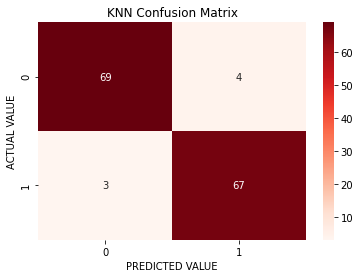

In [1135]:
sns.heatmap(knn_cm_minimal, annot=True, fmt="d", cmap="Reds")
plt.title("KNN Confusion Matrix")
plt.xlabel("PREDICTED VALUE")
plt.ylabel("ACTUAL VALUE")
plt.show()

### Minimal dataset results

In [1136]:
mininal_results = pd.DataFrame([
    ['Random forest', (rf_accuracy_minimal*100), rf_precision_minimal, rf_recall_minimal, rf_f1_minimal, rf_roc_auc_minimal],
    ['SVM', (svc_accuracy_minimal*100), svc_precision_minimal, svc_recall_minimal, svc_f1_minimal, svc_roc_auc_minimal],
    ['Decision tree', (dt_accuracy_minimal*100), dt_precision_minimal, dt_recall_minimal, dt_f1_minimal, dt_roc_auc_minimal],
    ['Multilayer Perceptron', (mlp_accuracy_minimal*100), mlp_precision_minimal, mlp_recall_minimal, mlp_f1_minimal, mlp_roc_auc_minimal],
    ['KNN', (knn_accuracy_minimal*100), knn_precision_minimal, knn_recall_minimal, knn_f1_minimal, knn_roc_auc_minimal]],
                       columns = ['Model','Accuracy %',' Precision','Recall','F1','ROC AUC'])


In [1137]:
mininal_results

,Model,Accuracy %,Precision,Recall,F1,ROC AUC
0,Random forest,99.300699,1.000000,0.985714,0.992806,0.992857
1,SVM,95.804196,0.970588,0.942857,0.956522,0.957730
2,Decision tree,96.503497,0.971014,0.957143,0.964029,0.964873
3,Multilayer Perceptron,97.202797,0.985294,0.957143,0.971014,0.971722
4,KNN,95.104895,0.943662,0.957143,0.950355,0.951174
